In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


## 1번

In [1]:
from datetime import datetime
import pandas_datareader.data as wb
 
start = datetime(2018,5,3)
end = datetime(2019,5,1)
 
train_df = wb.DataReader('005930.KS', 'yahoo',start,end) #삼성전자

C:\Users\eh063\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
start = datetime(2019,5,2)
end = datetime(2019,5,27)

test_df = wb.DataReader('005930.KS', 'yahoo',start,end) #삼성전자

In [3]:
import pandas as pd

train_df[train_df["Volume"]==0]
train_df.loc[train_df['Volume'] == 0, 'Volume'] = train_df['Volume'].median()

test_df[test_df["Volume"]==0]
test_df.loc[test_df['Volume'] == 0, 'Volume'] = test_df['Volume'].median()

In [4]:
from sklearn.tree import DecisionTreeRegressor

feature_names = ['High', 'Low', 'Close', 'Volume', 'Adj Close']
dt_reg = DecisionTreeRegressor()
dt_reg.fit(train_df[feature_names], train_df.Open)
predict = dt_reg.predict(test_df[feature_names])

In [5]:
# rmse 계산
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_df.Open, predict)
rmse = np.sqrt(mse)

In [6]:
rmse

573.5595768839486

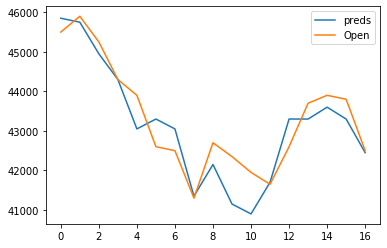

In [7]:
import matplotlib.pyplot as plt
plt.plot(predict, label="preds")
plt.plot(list(test_df.Open), label="Open")
plt.legend()
plt.show()

번외 : naive method

In [9]:
test_df['predict'] = predict

In [10]:
test_df['naive'] = test_df.predict.iloc[-1]
test_df

,High,Low,Open,Close,Volume,Adj Close,predict,naive
Date,,,,,,,,
2019-05-02,46150,45400,45500,45900,8625126.0,45900,45850.0,42450.0
2019-05-03,46050,45300,45900,45300,6562916.0,45300,45750.0,42450.0
2019-05-07,45300,44400,45250,44850,12014907.0,44850,44950.0,42450.0
2019-05-08,44850,44200,44300,44250,10398754.0,44250,44300.0,42450.0
2019-05-09,44250,42450,43900,42450,23029718.0,42450,43050.0,42450.0
2019-05-10,43450,42450,42600,42900,14579512.0,42900,43300.0,42450.0
2019-05-13,43200,42350,42500,42650,7635079.0,42650,43050.0,42450.0
2019-05-14,43100,41300,41300,42650,11563730.0,42650,41350.0,42450.0
2019-05-15,43050,42550,42700,42550,7670185.0,42550,42150.0,42450.0


In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_df.Open, test_df.naive)
rmse = np.sqrt(mse)
rmse

1579.1378884024773

# 2번

In [37]:
from datetime import datetime
import pandas_datareader.data as wb
 
start = datetime(2018,5,3)
end = datetime(2019,5,1)
 
df = wb.DataReader('005930.KS', 'yahoo',start,end) #삼성전자

In [38]:
import pandas as pd

df[df["Volume"]==0]
df.loc[df['Volume'] == 0, 'Volume'] = df['Volume'].median()

In [39]:
from sklearn.tree import DecisionTreeRegressor

feature_names = ['High', 'Low', 'Close', 'Volume', 'Adj Close']
n_samples = 30
y_hats = []
end = int(len(df) / 30)

for i in range(end+1):
    train_df = df[:n_samples]
    if i == end:
        start = datetime(2019,5,2)
        end = datetime(2019,5,27)
        test_df = wb.DataReader('005930.KS', 'yahoo',start,end)
        
        test_df[test_df["Volume"]==0]
        test_df.loc[test_df['Volume'] == 0, 'Volume'] = test_df['Volume'].median()
    else:
        test_df = df[n_samples:n_samples+30]

    dt_reg = DecisionTreeRegressor(random_state=256)
    dt_reg.fit(train_df[feature_names], train_df.Open)
    result = dt_reg.predict(test_df[feature_names])
    y_hats.append(result)
    
    n_samples = n_samples + 30
    if n_samples > len(df):
        n_smaples = len(df)

In [24]:
# y_hat 컬럼을 추가하기 위해 2018-05-03일부터 30일 동안의 y_hat을 0으로
y_hats_0 = [0 for x in range(30)]
y_hats = [y for x in y_hats for y in x]
y_hats = y_hats_0 + y_hats

# 2018년 5월 5월 3일부터 2019년 5월 27일까지의 데이터(훈련데이터+찐예측 데이터)
start = datetime(2018,5,3)
end = datetime(2019,5,27)
df = wb.DataReader('005930.KS', 'yahoo',start,end)

# Volume이 0인값 대체값으로 교체.
df[df["Volume"]==0]
df.loc[df['Volume'] == 0, 'Volume'] = df['Volume'].median()

# y_hat 컬럼 추가
df['y_hat'] = y_hats

# 훈련 시 필요한 컬럼
feature_names = ['High', 'Low', 'Close', 'Volume', 'Adj Close', 'y_hat']

# 훈련 데이터셋, 테스트 데이터셋 분리
train_df = df.iloc[30:241]
test_df = df.iloc[241:]

# DecisionTreeRegressor 학습/예측
dt_reg = DecisionTreeRegressor(random_state=256)
dt_reg.fit(train_df[feature_names], train_df.Open)
predict = dt_reg.predict(test_df[feature_names])

# rmse 계산
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_df.Open, predict)
rmse = np.sqrt(mse)

In [25]:
rmse

514.0668301712851

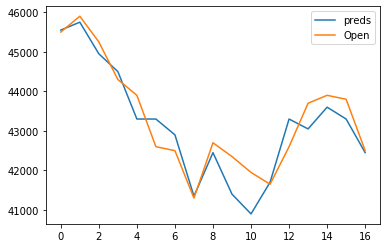

In [26]:
import matplotlib.pyplot as plt

plt.plot(predict, label="preds")
plt.plot(list(test_df.Open), label="Open")
plt.legend()
plt.show()

lgbm_reg + rf_reg + dt_reg

In [27]:
dt_reg = list(df.y_hat)

In [30]:
final_df = df.drop('y_hat', axis=1)
final_df['dt_yhat'] = dt_reg
final_df['rf_yhat'] = rf_reg
final_df

,High,Low,Open,Close,Volume,Adj Close,dt_yhat,rf_yhat
Date,,,,,,,,
2018-05-03,53000.0,53000.0,53000.0,53000.0,10796685.5,51733.824219,0.0,0.0
2018-05-04,53900.0,51800.0,53000.0,51900.0,39565391.0,50660.105469,0.0,0.0
2018-05-08,53200.0,51900.0,52600.0,52600.0,23104720.0,51343.382812,0.0,0.0
2018-05-09,52800.0,50900.0,52600.0,50900.0,16128305.0,49683.992188,0.0,0.0
2018-05-10,51700.0,50600.0,51700.0,51600.0,13905263.0,50367.269531,0.0,0.0
...,...,...,...,...,...,...,...,...
2019-05-21,43950.0,42350.0,42600.0,43150.0,18812133.0,43150.000000,43450.0,43322.5
2019-05-22,43800.0,42400.0,43700.0,43500.0,11033339.0,43500.000000,43450.0,43297.5
2019-05-23,44000.0,43250.0,43900.0,43850.0,12259006.0,43850.000000,43600.0,43578.5


In [31]:
final_df['lgbm_yhat'] = lgbm_reg

In [32]:
final_df = df.drop('y_hat', axis=1)
final_df['dt_yhat'] = dt_reg
final_df['rf_yhat'] = rf_reg
final_df['lgbm_yhat'] = lgbm_reg
final_df

,High,Low,Open,Close,Volume,Adj Close,dt_yhat,rf_yhat,lgbm_yhat
Date,,,,,,,,,
2018-05-03,53000.0,53000.0,53000.0,53000.0,10796685.5,51733.824219,0.0,0.0,0.000000
2018-05-04,53900.0,51800.0,53000.0,51900.0,39565391.0,50660.105469,0.0,0.0,0.000000
2018-05-08,53200.0,51900.0,52600.0,52600.0,23104720.0,51343.382812,0.0,0.0,0.000000
2018-05-09,52800.0,50900.0,52600.0,50900.0,16128305.0,49683.992188,0.0,0.0,0.000000
2018-05-10,51700.0,50600.0,51700.0,51600.0,13905263.0,50367.269531,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
2019-05-21,43950.0,42350.0,42600.0,43150.0,18812133.0,43150.000000,43450.0,43322.5,43205.507761
2019-05-22,43800.0,42400.0,43700.0,43500.0,11033339.0,43500.000000,43450.0,43297.5,43287.311175
2019-05-23,44000.0,43250.0,43900.0,43850.0,12259006.0,43850.000000,43600.0,43578.5,43584.563727


In [33]:
# 훈련 시 필요한 컬럼
feature_names = ['High', 'Low', 'Close', 'Volume', 'Adj Close', 'dt_yhat', 'rf_yhat', 'lgbm_yhat']

# 훈련 데이터셋, 테스트 데이터셋 분리
train_df = final_df.iloc[30:241]
test_df = final_df.iloc[241:]

# DecisionTreeRegressor 학습/예측
dt_reg = DecisionTreeRegressor(random_state=256)
dt_reg.fit(train_df[feature_names], train_df.Open)
predict = dt_reg.predict(test_df[feature_names])

# rmse 계산
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_df.Open, predict)
rmse = np.sqrt(mse)

In [34]:
rmse

546.6475367288914

In [36]:
# 훈련 시 필요한 컬럼
feature_names = ['High', 'Low', 'Close', 'Volume', 'Adj Close', 'dt_yhat', 'rf_yhat']

# 훈련 데이터셋, 테스트 데이터셋 분리
train_df = final_df.iloc[30:241]
test_df = final_df.iloc[241:]

# DecisionTreeRegressor 학습/예측(lgbm 제외)
dt_reg = DecisionTreeRegressor(random_state=256)
dt_reg.fit(train_df[feature_names], train_df.Open)
predict = dt_reg.predict(test_df[feature_names])

# rmse 계산
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_df.Open, predict)
rmse = np.sqrt(mse)
rmse

565.685424949238

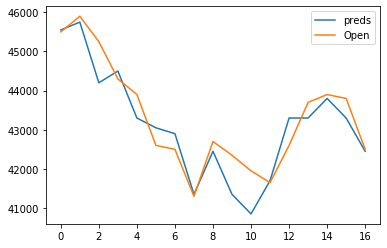

In [28]:
import matplotlib.pyplot as plt

plt.plot(predict, label="preds")
plt.plot(list(test_df.Open), label="Open")
plt.legend()
plt.show()

# 3번  
1번에서 rmse가 제일 낮은 모델을 정상성있는 open값으로 변경 후 학습

In [15]:
from datetime import datetime
import pandas_datareader.data as wb
import pandas as pd

# train_df 로딩
start = datetime(2018,5,3)
end = datetime(2019,5,1)
train_df = wb.DataReader('005930.KS', 'yahoo',start,end) #삼성전자

# train_df - Volume이 0인 값은 median값으로 대체
train_df[train_df["Volume"]==0]
train_df.loc[train_df['Volume'] == 0, 'Volume'] = train_df['Volume'].median()

# test_df 로딩
start = datetime(2019,5,2)
end = datetime(2019,5,27)
test_df = wb.DataReader('005930.KS', 'yahoo',start,end) #삼성전자

# test_df - Volume이 0인 값은 median값으로 대체
test_df[test_df["Volume"]==0]
test_df.loc[test_df['Volume'] == 0, 'Volume'] = test_df['Volume'].median()

In [16]:
train_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-03,53000.0,53000.0,53000.0,53000.0,10638766.0,51733.824219
2018-05-04,53900.0,51800.0,53000.0,51900.0,39565391.0,50660.105469
2018-05-08,53200.0,51900.0,52600.0,52600.0,23104720.0,51343.382812
2018-05-09,52800.0,50900.0,52600.0,50900.0,16128305.0,49683.992188
2018-05-10,51700.0,50600.0,51700.0,51600.0,13905263.0,50367.269531
...,...,...,...,...,...,...
2019-04-24,45650.0,44150.0,45400.0,44750.0,13299267.0,44750.000000
2019-04-25,45000.0,44100.0,44250.0,44650.0,10868965.0,44650.000000
2019-04-26,45000.0,43800.0,44200.0,44850.0,9739982.0,44850.000000


In [17]:
test_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-02,46150,45400,45500,45900,8625126.0,45900
2019-05-03,46050,45300,45900,45300,6562916.0,45300
2019-05-07,45300,44400,45250,44850,12014907.0,44850
2019-05-08,44850,44200,44300,44250,10398754.0,44250
2019-05-09,44250,42450,43900,42450,23029718.0,42450
2019-05-10,43450,42450,42600,42900,14579512.0,42900
2019-05-13,43200,42350,42500,42650,7635079.0,42650
2019-05-14,43100,41300,41300,42650,11563730.0,42650
2019-05-15,43050,42550,42700,42550,7670185.0,42550


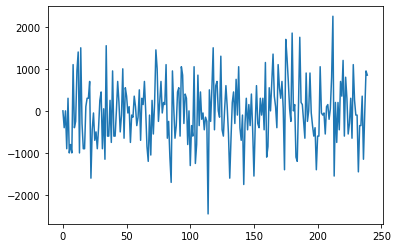

,High,Low,Open,Close,Volume,Adj Close,Open_normal
Date,,,,,,,
2018-05-04,53900.0,51800.0,53000.0,51900.0,39565391.0,50660.105469,0.0
2018-05-08,53200.0,51900.0,52600.0,52600.0,23104720.0,51343.382812,-400.0
2018-05-09,52800.0,50900.0,52600.0,50900.0,16128305.0,49683.992188,0.0
2018-05-10,51700.0,50600.0,51700.0,51600.0,13905263.0,50367.269531,-900.0
2018-05-11,52200.0,51200.0,52000.0,51300.0,10314997.0,50074.437500,300.0
...,...,...,...,...,...,...,...
2019-04-24,45650.0,44150.0,45400.0,44750.0,13299267.0,44750.000000,350.0
2019-04-25,45000.0,44100.0,44250.0,44650.0,10868965.0,44650.000000,-1150.0
2019-04-26,45000.0,43800.0,44200.0,44850.0,9739982.0,44850.000000,-50.0


In [18]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import matplotlib.pyplot as plt

# train_df - 정상성 시계열로 변환
y =train_df['Open']
b=[]
for i in range(1, len(y)):
    b.append(y[i] - y[i-1])
plt.plot(b)
plt.show()

# 정상성으로 변환시킨 Open값인 Open_normal 칼럼 추가
train_df = train_df.drop(train_df.index[0])
train_df['Open_normal'] = b
train_df

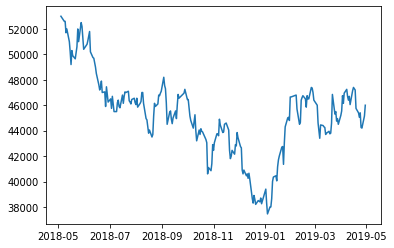

In [19]:
plt.plot(train_df.Open)

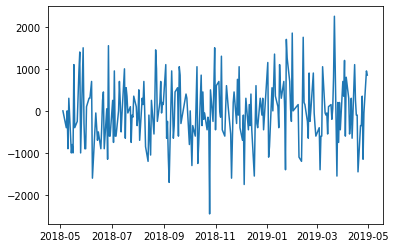

In [20]:
plt.plot(train_df.Open_normal)

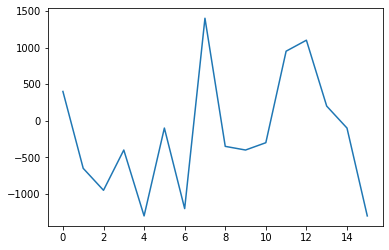

,High,Low,Open,Close,Volume,Adj Close,Open_normal
Date,,,,,,,
2019-05-03,46050,45300,45900,45300,6562916.0,45300,400
2019-05-07,45300,44400,45250,44850,12014907.0,44850,-650
2019-05-08,44850,44200,44300,44250,10398754.0,44250,-950
2019-05-09,44250,42450,43900,42450,23029718.0,42450,-400
2019-05-10,43450,42450,42600,42900,14579512.0,42900,-1300
2019-05-13,43200,42350,42500,42650,7635079.0,42650,-100
2019-05-14,43100,41300,41300,42650,11563730.0,42650,-1200
2019-05-15,43050,42550,42700,42550,7670185.0,42550,1400
2019-05-16,42400,41350,42350,41550,13687828.0,41550,-350


In [48]:
# test_df - 정상성 시계열로 변환
y =test_df['Open']
b=[]
for i in range(1, len(y)):
    b.append(y[i]-y[i-1])
plt.plot(b)
plt.show()

# 정상성으로 변환시킨 Open값인 Open_normal 칼럼 추가
test_df = test_df.drop(test_df.index[0])
test_df['Open_normal'] = b
test_df

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

feature_names = ['High', 'Low', 'Close', 'Volume', 'Adj Close']

# DecisionTreeRegressor 학습/예측
dt_reg = DecisionTreeRegressor(random_state=256)
dt_reg.fit(train_df[feature_names], train_df.Open_normal)
dt_predict = dt_reg.predict(test_df[feature_names])

# RandomForestRegressor 학습/예측
rf_reg = RandomForestRegressor(random_state=256)
rf_reg.fit(train_df[feature_names], train_df.Open_normal)
rf_predict = rf_reg.predict(test_df[feature_names])

# LGBMRegressor 학습/예측
lgbm_reg = LGBMRegressor(boosting_type='gbdt',
                            objective='regression',
                            max_depth=10, 
                            learning_rate=0.5,
                            verbose=0, 
                            random_state=256)
lgbm_reg.fit(train_df[feature_names], train_df.Open_normal)
lgbm_predict = lgbm_reg.predict(test_df[feature_names])

In [50]:
# test 데이터셋에 예측값(정상성)인 predict_noraml 열 추가
test_df['dt_predict_normal'] = dt_predict
test_df['rf_predict_normal'] = rf_predict
test_df['lgbm_predict_normal'] = lgbm_predict
test_df

,High,Low,Open,Close,Volume,Adj Close,Open_normal,dt_predict_normal,rf_predict_normal,lgbm_predict_normal
Date,,,,,,,,,,
2019-05-03,46050,45300,45900,45300,6562916.0,45300,400,-1450.0,-540.0,-691.872573
2019-05-07,45300,44400,45250,44850,12014907.0,44850,-650,50.0,-503.0,-382.501841
2019-05-08,44850,44200,44300,44250,10398754.0,44250,-950,-1400.0,-386.5,-827.994778
2019-05-09,44250,42450,43900,42450,23029718.0,42450,-400,400.0,429.5,14.224776
2019-05-10,43450,42450,42600,42900,14579512.0,42900,-1300,-150.0,551.5,1546.733816
2019-05-13,43200,42350,42500,42650,7635079.0,42650,-100,-450.0,123.5,648.035128
2019-05-14,43100,41300,41300,42650,11563730.0,42650,-1200,550.0,-52.5,8.694485
2019-05-15,43050,42550,42700,42550,7670185.0,42550,1400,-450.0,206.0,175.497943
2019-05-16,42400,41350,42350,41550,13687828.0,41550,-350,-250.0,-325.5,-308.444679


In [51]:
# E_t+E_(t-1)+...+E(2)+y_(1) #차분한 데이터의 t시점의 예측값
dt_predict_unormal = []
rf_predict_unormal = []
lgbm_predict_unormal = []
y_1 = 45500 #2019년 5월 2일 Open값

for i in range(len(test_df)):
    dt_unormal = 0
    rf_unormal = 0
    lgbm_unormal = 0
    # 첫번째항(2019년 5월 3일)의 경우 역차분값 = 2019년 5월 3일 차분예측값 + 2019년 5월 2일 Open값
    if i==0:
        dt_unormal = dt_unormal + test_df.dt_predict_normal.iloc[i]
        rf_unormal = rf_unormal + test_df.rf_predict_normal.iloc[i]
        lgbm_unormal = lgbm_unormal + test_df.lgbm_predict_normal.iloc[i]
    else: 
        for j in range(i):
            dt_unormal = dt_unormal + test_df.dt_predict_normal.iloc[j]
            rf_unormal = rf_unormal + test_df.rf_predict_normal.iloc[j]
            lgbm_unormal = lgbm_unormal + test_df.lgbm_predict_normal.iloc[j]
    
    dt_unormal = dt_unormal + y_1
    rf_unormal = rf_unormal + y_1
    lgbm_unormal = lgbm_unormal + y_1
    
    dt_predict_unormal.append(dt_unormal)
    rf_predict_unormal.append(rf_unormal)
    lgbm_predict_unormal.append(lgbm_unormal)

In [52]:
test_df['dt_predict_unormal'] = dt_predict_unormal
test_df['rf_predict_unormal'] = rf_predict_unormal
test_df['lgbm_predict_unormal'] = lgbm_predict_unormal
test_df

,High,Low,Open,Close,Volume,Adj Close,Open_normal,dt_predict_normal,rf_predict_normal,lgbm_predict_normal,dt_predict_unormal,rf_predict_unormal,lgbm_predict_unormal
Date,,,,,,,,,,,,,
2019-05-03,46050,45300,45900,45300,6562916.0,45300,400,-1450.0,-540.0,-691.872573,44050.0,44960.0,44808.127427
2019-05-07,45300,44400,45250,44850,12014907.0,44850,-650,50.0,-503.0,-382.501841,44050.0,44960.0,44808.127427
2019-05-08,44850,44200,44300,44250,10398754.0,44250,-950,-1400.0,-386.5,-827.994778,44100.0,44457.0,44425.625586
2019-05-09,44250,42450,43900,42450,23029718.0,42450,-400,400.0,429.5,14.224776,42700.0,44070.5,43597.630808
2019-05-10,43450,42450,42600,42900,14579512.0,42900,-1300,-150.0,551.5,1546.733816,43100.0,44500.0,43611.855584
2019-05-13,43200,42350,42500,42650,7635079.0,42650,-100,-450.0,123.5,648.035128,42950.0,45051.5,45158.589400
2019-05-14,43100,41300,41300,42650,11563730.0,42650,-1200,550.0,-52.5,8.694485,42500.0,45175.0,45806.624528
2019-05-15,43050,42550,42700,42550,7670185.0,42550,1400,-450.0,206.0,175.497943,43050.0,45122.5,45815.319013
2019-05-16,42400,41350,42350,41550,13687828.0,41550,-350,-250.0,-325.5,-308.444679,42600.0,45328.5,45990.816956


In [53]:
# rmse 계산 - Open(Open 비정상성) vs predict_inverse(Open 예측값 비정상성)
import numpy as np
from sklearn.metrics import mean_squared_error

rf_mse = mean_squared_error(test_df.Open_normal, test_df.rf_predict_unormal)
rf_rmse = np.sqrt(rf_mse)

dt_mse = mean_squared_error(test_df.Open_normal, test_df.dt_predict_normal)
dt_rmse = np.sqrt(dt_mse)

lgbm_mse = mean_squared_error(test_df.Open_normal, test_df.lgbm_predict_normal)
lgbm_rmse = np.sqrt(lgbm_mse)

print("rf : ", rf_rmse, ", dt : ", dt_rmse, ", lgbm_rmse : ", lgbm_rmse)

rf :  44804.25738647082 , dt :  1137.9120132945254 , lgbm_rmse :  1052.112767946583


In [54]:
# 차분한 예측 데이터 vs 차분한 원본 데이터
rf_mse = mean_squared_error(test_df.Open, test_df.rf_predict_normal)
rf_rmse = np.sqrt(rf_mse)

dt_mse = mean_squared_error(test_df.Open, test_df.dt_predict_unormal)
dt_rmse = np.sqrt(dt_mse)

lgbm_mse = mean_squared_error(test_df.Open, test_df.lgbm_predict_unormal)
lgbm_rmse = np.sqrt(lgbm_mse)

print("rf : ", rf_rmse, ", dt : ", dt_rmse, ", lgbm_rmse : ", lgbm_rmse)

rf :  43303.303486317585 , dt :  1348.0889251084293 , lgbm_rmse :  2311.5070359532083


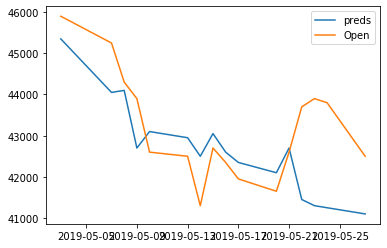

In [152]:
import matplotlib.pyplot as plt

plt.plot(test_df.dt_predict_unormal, label="preds")
plt.plot(test_df.Open, label="Open")
plt.legend()
plt.show()

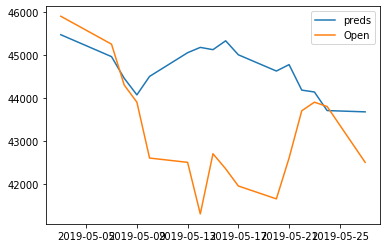

In [153]:
plt.plot(test_df.rf_predict_unormal, label="preds")
plt.plot(test_df.Open, label="Open")
plt.legend()
plt.show()

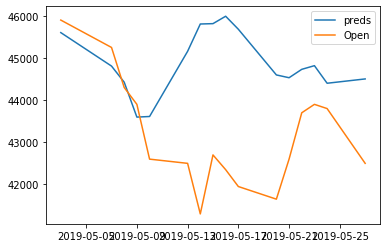

In [154]:
plt.plot(test_df.lgbm_predict_unormal, label="preds")
plt.plot(test_df.Open, label="Open")
plt.legend()
plt.show()

# 4번  
y_hat 다 합쳐서 open값 정상성 있는 값으로 바꾸고 2번에서 rmse가 가장 낮았던 모델에 학습.

## DecisionTree Regressor

In [23]:
from datetime import datetime
import pandas_datareader.data as wb
 
start = datetime(2018,5,3)
end = datetime(2019,5,1)
train_df = wb.DataReader('005930.KS', 'yahoo',start,end) #삼성전자

start = datetime(2019,5,2)
end = datetime(2019,5,27)
test_df = wb.DataReader('005930.KS', 'yahoo',start,end) #삼성전자

In [24]:
import pandas as pd

train_df[train_df["Volume"]==0]
train_df.loc[train_df['Volume'] == 0, 'Volume'] = train_df['Volume'].median()

test_df[test_df["Volume"]==0]
test_df.loc[test_df['Volume'] == 0, 'Volume'] = test_df['Volume'].median()

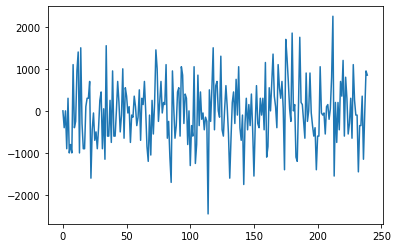

,High,Low,Open,Close,Volume,Adj Close,Open_normal
Date,,,,,,,
2018-05-04,53900.0,51800.0,53000.0,51900.0,39565391.0,50660.105469,0.0
2018-05-08,53200.0,51900.0,52600.0,52600.0,23104720.0,51343.382812,-400.0
2018-05-09,52800.0,50900.0,52600.0,50900.0,16128305.0,49683.992188,0.0
2018-05-10,51700.0,50600.0,51700.0,51600.0,13905263.0,50367.269531,-900.0
2018-05-11,52200.0,51200.0,52000.0,51300.0,10314997.0,50074.437500,300.0
...,...,...,...,...,...,...,...
2019-04-24,45650.0,44150.0,45400.0,44750.0,13299267.0,44750.000000,350.0
2019-04-25,45000.0,44100.0,44250.0,44650.0,10868965.0,44650.000000,-1150.0
2019-04-26,45000.0,43800.0,44200.0,44850.0,9739982.0,44850.000000,-50.0


In [25]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import matplotlib.pyplot as plt

# train_df - 정상성 시계열로 변환
y =train_df['Open']
b=[]
for i in range(1, len(y)):
    b.append(y[i] - y[i-1])
plt.plot(b)
plt.show()

# 정상성으로 변환시킨 Open값인 Open_normal 칼럼 추가
train_df = train_df.drop(train_df.index[0])
train_df['Open_normal'] = b
train_df

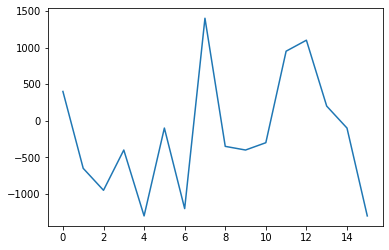

,High,Low,Open,Close,Volume,Adj Close,Open_normal
Date,,,,,,,
2019-05-03,46050,45300,45900,45300,6562916.0,45300,400
2019-05-07,45300,44400,45250,44850,12014907.0,44850,-650
2019-05-08,44850,44200,44300,44250,10398754.0,44250,-950
2019-05-09,44250,42450,43900,42450,23029718.0,42450,-400
2019-05-10,43450,42450,42600,42900,14579512.0,42900,-1300
2019-05-13,43200,42350,42500,42650,7635079.0,42650,-100
2019-05-14,43100,41300,41300,42650,11563730.0,42650,-1200
2019-05-15,43050,42550,42700,42550,7670185.0,42550,1400
2019-05-16,42400,41350,42350,41550,13687828.0,41550,-350


In [26]:
# test_df - 정상성 시계열로 변환
y =test_df['Open']
b=[]
for i in range(1, len(y)):
    b.append(y[i]-y[i-1])
plt.plot(b)
plt.show()

# 정상성으로 변환시킨 Open값인 Open_normal 칼럼 추가
test_df = test_df.drop(test_df.index[0])
test_df['Open_normal'] = b
test_df

In [47]:
from sklearn.tree import DecisionTreeRegressor

feature_names = ['High', 'Low', 'Close', 'Volume', 'Adj Close']
n_samples = 30
y_hats = []
total_length = len(train_df) + len(test_df)
end = int(total_length / 30)

for i in range(end):
    if i == end-1:
        corss_train = train_df
        cross_test = test_df
    else:
        cross_train = train_df[:n_samples]
        cross_test = train_df[n_samples:n_samples+30]

    dt_reg = DecisionTreeRegressor(random_state=256)
    dt_reg.fit(cross_train[feature_names], cross_train.Open_normal)
    result = dt_reg.predict(cross_test[feature_names])
    y_hats.append(result)
    
    n_samples = n_samples + 30

In [58]:
# y_hat 컬럼을 추가하기 위해 2018-05-03일부터 30일 동안의 y_hat을 0으로
y_hats_0 = [0 for x in range(30)]
y_hats = [y for x in y_hats for y in x]
dt_y_hats = y_hats_0 + y_hats

train_df['dt_yhat'] = dt_y_hats[:len(train_df)]
test_df['dt_yhat'] = dt_y_hats[len(train_df):]

# 훈련 시 필요한 컬럼
feature_names = ['High', 'Low', 'Close', 'Volume', 'Adj Close', 'dt_yhat']

# DecisionTreeRegressor 학습/예측
dt_reg = DecisionTreeRegressor(random_state=256)
dt_reg.fit(train_df[feature_names], train_df.Open_normal)
dt_predict = dt_reg.predict(test_df[feature_names])
test_df['dt_predict_normal'] = dt_predict

In [59]:
test_df

,High,Low,Open,Close,Volume,Adj Close,Open_normal,dt_yhat,dt_predict_normal
Date,,,,,,,,,
2019-05-03,46050,45300,45900,45300,6562916.0,45300,400,0.0,-1450.0
2019-05-07,45300,44400,45250,44850,12014907.0,44850,-650,-650.0,350.0
2019-05-08,44850,44200,44300,44250,10398754.0,44250,-950,-1050.0,-1400.0
2019-05-09,44250,42450,43900,42450,23029718.0,42450,-400,400.0,400.0
2019-05-10,43450,42450,42600,42900,14579512.0,42900,-1300,-700.0,-700.0
2019-05-13,43200,42350,42500,42650,7635079.0,42650,-100,-450.0,-450.0
2019-05-14,43100,41300,41300,42650,11563730.0,42650,-1200,550.0,700.0
2019-05-15,43050,42550,42700,42550,7670185.0,42550,1400,-450.0,-450.0
2019-05-16,42400,41350,42350,41550,13687828.0,41550,-350,-1400.0,-1400.0


In [60]:
# E_t+E_(t-1)+...+E(2)+y_(1) #차분한 데이터의 t시점의 예측값
dt_predict_unormal = []
y_1 = 45500 #2019년 5월 2일 Open값

for i in range(len(test_df)):
    dt_unormal = 0
    # 첫번째항(2019년 5월 3일)의 경우 역차분값 = 2019년 5월 3일 차분예측값 + 2019년 5월 2일 Open값
    if i==0:
        dt_unormal = dt_unormal + test_df.dt_predict_normal.iloc[i]
    else: 
        for j in range(i):
            dt_unormal = dt_unormal + test_df.dt_predict_normal.iloc[j]
    
    dt_unormal = dt_unormal + y_1
    
    dt_predict_unormal.append(dt_unormal)
    
test_df['dt_predict_unormal'] = dt_predict_unormal
test_df

,High,Low,Open,Close,Volume,Adj Close,Open_normal,dt_yhat,dt_predict_normal,dt_predict_unormal
Date,,,,,,,,,,
2019-05-03,46050,45300,45900,45300,6562916.0,45300,400,0.0,-1450.0,44050.0
2019-05-07,45300,44400,45250,44850,12014907.0,44850,-650,-650.0,350.0,44050.0
2019-05-08,44850,44200,44300,44250,10398754.0,44250,-950,-1050.0,-1400.0,44400.0
2019-05-09,44250,42450,43900,42450,23029718.0,42450,-400,400.0,400.0,43000.0
2019-05-10,43450,42450,42600,42900,14579512.0,42900,-1300,-700.0,-700.0,43400.0
2019-05-13,43200,42350,42500,42650,7635079.0,42650,-100,-450.0,-450.0,42700.0
2019-05-14,43100,41300,41300,42650,11563730.0,42650,-1200,550.0,700.0,42250.0
2019-05-15,43050,42550,42700,42550,7670185.0,42550,1400,-450.0,-450.0,42950.0
2019-05-16,42400,41350,42350,41550,13687828.0,41550,-350,-1400.0,-1400.0,42500.0


In [61]:
dt_mse = mean_squared_error(test_df.Open_normal, test_df.dt_predict_normal)
dt_rmse = np.sqrt(dt_mse)
dt_rmse

1233.326295024962

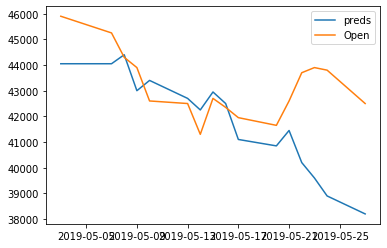

In [62]:
import matplotlib.pyplot as plt

plt.plot(test_df.dt_predict_unormal, label="preds")
plt.plot(test_df.Open, label="Open")
plt.legend()
plt.show()

## RandomForest Regressor

In [63]:
from datetime import datetime
import pandas_datareader.data as wb
 
start = datetime(2018,5,3)
end = datetime(2019,5,1)
train_df = wb.DataReader('005930.KS', 'yahoo',start,end) #삼성전자

start = datetime(2019,5,2)
end = datetime(2019,5,27)
test_df = wb.DataReader('005930.KS', 'yahoo',start,end) #삼성전자

In [64]:
import pandas as pd

train_df[train_df["Volume"]==0]
train_df.loc[train_df['Volume'] == 0, 'Volume'] = train_df['Volume'].median()

test_df[test_df["Volume"]==0]
test_df.loc[test_df['Volume'] == 0, 'Volume'] = test_df['Volume'].median()

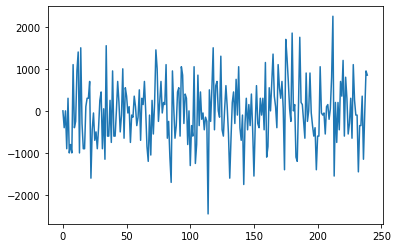

,High,Low,Open,Close,Volume,Adj Close,Open_normal
Date,,,,,,,
2018-05-04,53900.0,51800.0,53000.0,51900.0,39565391.0,50660.105469,0.0
2018-05-08,53200.0,51900.0,52600.0,52600.0,23104720.0,51343.382812,-400.0
2018-05-09,52800.0,50900.0,52600.0,50900.0,16128305.0,49683.992188,0.0
2018-05-10,51700.0,50600.0,51700.0,51600.0,13905263.0,50367.269531,-900.0
2018-05-11,52200.0,51200.0,52000.0,51300.0,10314997.0,50074.437500,300.0
...,...,...,...,...,...,...,...
2019-04-24,45650.0,44150.0,45400.0,44750.0,13299267.0,44750.000000,350.0
2019-04-25,45000.0,44100.0,44250.0,44650.0,10868965.0,44650.000000,-1150.0
2019-04-26,45000.0,43800.0,44200.0,44850.0,9739982.0,44850.000000,-50.0


In [65]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import matplotlib.pyplot as plt

# train_df - 정상성 시계열로 변환
y =train_df['Open']
b=[]
for i in range(1, len(y)):
    b.append(y[i] - y[i-1])
plt.plot(b)
plt.show()

# 정상성으로 변환시킨 Open값인 Open_normal 칼럼 추가
train_df = train_df.drop(train_df.index[0])
train_df['Open_normal'] = b
train_df

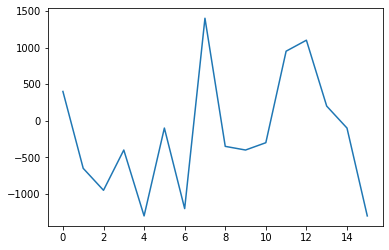

,High,Low,Open,Close,Volume,Adj Close,Open_normal
Date,,,,,,,
2019-05-03,46050,45300,45900,45300,6562916.0,45300,400
2019-05-07,45300,44400,45250,44850,12014907.0,44850,-650
2019-05-08,44850,44200,44300,44250,10398754.0,44250,-950
2019-05-09,44250,42450,43900,42450,23029718.0,42450,-400
2019-05-10,43450,42450,42600,42900,14579512.0,42900,-1300
2019-05-13,43200,42350,42500,42650,7635079.0,42650,-100
2019-05-14,43100,41300,41300,42650,11563730.0,42650,-1200
2019-05-15,43050,42550,42700,42550,7670185.0,42550,1400
2019-05-16,42400,41350,42350,41550,13687828.0,41550,-350


In [66]:
# test_df - 정상성 시계열로 변환
y =test_df['Open']
b=[]
for i in range(1, len(y)):
    b.append(y[i]-y[i-1])
plt.plot(b)
plt.show()

# 정상성으로 변환시킨 Open값인 Open_normal 칼럼 추가
test_df = test_df.drop(test_df.index[0])
test_df['Open_normal'] = b
test_df

In [67]:
from sklearn.ensemble import RandomForestRegressor

feature_names = ['High', 'Low', 'Close', 'Volume', 'Adj Close']
n_samples = 30
y_hats = []
total_length = len(train_df) + len(test_df)
end = int(total_length / 30)

for i in range(end):
    if i == end-1:
        corss_train = train_df
        cross_test = test_df
    else:
        cross_train = train_df[:n_samples]
        cross_test = train_df[n_samples:n_samples+30]

    rf_reg = RandomForestRegressor(random_state=256)
    rf_reg.fit(cross_train[feature_names], cross_train.Open_normal)
    result = rf_reg.predict(cross_test[feature_names])
    y_hats.append(result)
    
    n_samples = n_samples + 30

In [68]:
# y_hat 컬럼을 추가하기 위해 2018-05-03일부터 30일 동안의 y_hat을 0으로
y_hats_0 = [0 for x in range(30)]
y_hats = [y for x in y_hats for y in x]
rf_y_hats = y_hats_0 + y_hats

train_df['rf_yhat'] = rf_y_hats[:len(train_df)]
test_df['rf_yhat'] = rf_y_hats[len(train_df):]

# 훈련 시 필요한 컬럼
feature_names = ['High', 'Low', 'Close', 'Volume', 'Adj Close', 'rf_yhat']

# DecisionTreeRegressor 학습/예측
rf_reg = RandomForestRegressor(random_state=256)
rf_reg.fit(train_df[feature_names], train_df.Open_normal)
rf_predict = rf_reg.predict(test_df[feature_names])
test_df['rf_predict_normal'] = rf_predict

In [69]:
# E_t+E_(t-1)+...+E(2)+y_(1) #차분한 데이터의 t시점의 예측값
rf_predict_unormal = []
y_1 = 45500 #2019년 5월 2일 Open값

for i in range(len(test_df)):
    rf_unormal = 0
    # 첫번째항(2019년 5월 3일)의 경우 역차분값 = 2019년 5월 3일 차분예측값 + 2019년 5월 2일 Open값
    if i==0:
        rf_unormal = rf_unormal + test_df.rf_predict_normal.iloc[i]
    else: 
        for j in range(i):
            rf_unormal = rf_unormal + test_df.rf_predict_normal.iloc[j]
    
    rf_unormal = rf_unormal + y_1
    
    rf_predict_unormal.append(rf_unormal)
    
test_df['rf_predict_unormal'] = rf_predict_unormal
test_df

,High,Low,Open,Close,Volume,Adj Close,Open_normal,rf_yhat,rf_predict_normal,rf_predict_unormal
Date,,,,,,,,,,
2019-05-03,46050,45300,45900,45300,6562916.0,45300,400,-145.5,-441.5,45058.5
2019-05-07,45300,44400,45250,44850,12014907.0,44850,-650,-677.0,498.5,45058.5
2019-05-08,44850,44200,44300,44250,10398754.0,44250,-950,-343.0,-332.5,45557.0
2019-05-09,44250,42450,43900,42450,23029718.0,42450,-400,395.0,36.5,45224.5
2019-05-10,43450,42450,42600,42900,14579512.0,42900,-1300,472.5,191.0,45261.0
2019-05-13,43200,42350,42500,42650,7635079.0,42650,-100,125.0,317.5,45452.0
2019-05-14,43100,41300,41300,42650,11563730.0,42650,-1200,-67.0,-499.0,45769.5
2019-05-15,43050,42550,42700,42550,7670185.0,42550,1400,162.0,274.5,45270.5
2019-05-16,42400,41350,42350,41550,13687828.0,41550,-350,-325.0,-342.5,45545.0


In [70]:
rf_mse = mean_squared_error(test_df.Open_normal, test_df.rf_predict_normal)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

925.2848041278966

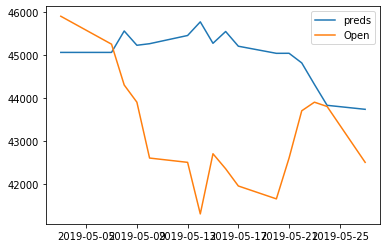

In [71]:
import matplotlib.pyplot as plt

plt.plot(test_df.rf_predict_unormal, label="preds")
plt.plot(test_df.Open, label="Open")
plt.legend()
plt.show()

## LightGBM Regressor

In [72]:
from datetime import datetime
import pandas_datareader.data as wb
 
start = datetime(2018,5,3)
end = datetime(2019,5,1)
train_df = wb.DataReader('005930.KS', 'yahoo',start,end) #삼성전자

start = datetime(2019,5,2)
end = datetime(2019,5,27)
test_df = wb.DataReader('005930.KS', 'yahoo',start,end) #삼성전자

In [73]:
import pandas as pd

train_df[train_df["Volume"]==0]
train_df.loc[train_df['Volume'] == 0, 'Volume'] = train_df['Volume'].median()

test_df[test_df["Volume"]==0]
test_df.loc[test_df['Volume'] == 0, 'Volume'] = test_df['Volume'].median()

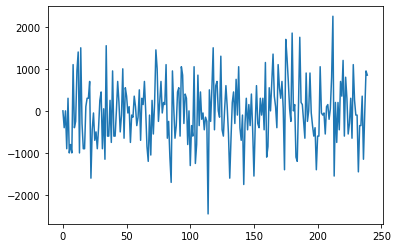

,High,Low,Open,Close,Volume,Adj Close,Open_normal
Date,,,,,,,
2018-05-04,53900.0,51800.0,53000.0,51900.0,39565391.0,50660.105469,0.0
2018-05-08,53200.0,51900.0,52600.0,52600.0,23104720.0,51343.382812,-400.0
2018-05-09,52800.0,50900.0,52600.0,50900.0,16128305.0,49683.992188,0.0
2018-05-10,51700.0,50600.0,51700.0,51600.0,13905263.0,50367.269531,-900.0
2018-05-11,52200.0,51200.0,52000.0,51300.0,10314997.0,50074.437500,300.0
...,...,...,...,...,...,...,...
2019-04-24,45650.0,44150.0,45400.0,44750.0,13299267.0,44750.000000,350.0
2019-04-25,45000.0,44100.0,44250.0,44650.0,10868965.0,44650.000000,-1150.0
2019-04-26,45000.0,43800.0,44200.0,44850.0,9739982.0,44850.000000,-50.0


In [74]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import matplotlib.pyplot as plt

# train_df - 정상성 시계열로 변환
y =train_df['Open']
b=[]
for i in range(1, len(y)):
    b.append(y[i] - y[i-1])
plt.plot(b)
plt.show()

# 정상성으로 변환시킨 Open값인 Open_normal 칼럼 추가
train_df = train_df.drop(train_df.index[0])
train_df['Open_normal'] = b
train_df

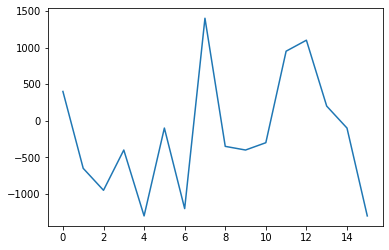

,High,Low,Open,Close,Volume,Adj Close,Open_normal
Date,,,,,,,
2019-05-03,46050,45300,45900,45300,6562916.0,45300,400
2019-05-07,45300,44400,45250,44850,12014907.0,44850,-650
2019-05-08,44850,44200,44300,44250,10398754.0,44250,-950
2019-05-09,44250,42450,43900,42450,23029718.0,42450,-400
2019-05-10,43450,42450,42600,42900,14579512.0,42900,-1300
2019-05-13,43200,42350,42500,42650,7635079.0,42650,-100
2019-05-14,43100,41300,41300,42650,11563730.0,42650,-1200
2019-05-15,43050,42550,42700,42550,7670185.0,42550,1400
2019-05-16,42400,41350,42350,41550,13687828.0,41550,-350


In [75]:
# test_df - 정상성 시계열로 변환
y =test_df['Open']
b=[]
for i in range(1, len(y)):
    b.append(y[i]-y[i-1])
plt.plot(b)
plt.show()

# 정상성으로 변환시킨 Open값인 Open_normal 칼럼 추가
test_df = test_df.drop(test_df.index[0])
test_df['Open_normal'] = b
test_df

In [77]:
from lightgbm import LGBMRegressor

feature_names = ['High', 'Low', 'Close', 'Volume', 'Adj Close']
n_samples = 30
y_hats = []
total_length = len(train_df) + len(test_df)
end = int(total_length / 30)

for i in range(end):
    if i == end-1:
        corss_train = train_df
        cross_test = test_df
    else:
        cross_train = train_df[:n_samples]
        cross_test = train_df[n_samples:n_samples+30]

    lgbm_reg = LGBMRegressor(random_state=256)
    lgbm_reg.fit(cross_train[feature_names], cross_train.Open_normal)
    result = lgbm_reg.predict(cross_test[feature_names])
    y_hats.append(result)
    
    n_samples = n_samples + 30

In [78]:
# y_hat 컬럼을 추가하기 위해 2018-05-03일부터 30일 동안의 y_hat을 0으로
y_hats_0 = [0 for x in range(30)]
y_hats = [y for x in y_hats for y in x]
lgbm_y_hats = y_hats_0 + y_hats

train_df['lgbm_yhat'] = lgbm_y_hats[:len(train_df)]
test_df['lgbm_yhat'] = lgbm_y_hats[len(train_df):]

# 훈련 시 필요한 컬럼
feature_names = ['High', 'Low', 'Close', 'Volume', 'Adj Close', 'lgbm_yhat']

# LGBMRegressor 학습/예측
lgbm_reg = LGBMRegressor(random_state=256)
lgbm_reg.fit(train_df[feature_names], train_df.Open_normal)
lgbm_predict = lgbm_reg.predict(test_df[feature_names])
test_df['lgbm_predict_normal'] = lgbm_predict

In [79]:
# E_t+E_(t-1)+...+E(2)+y_(1) #차분한 데이터의 t시점의 예측값
lgbm_predict_unormal = []
y_1 = 45500 #2019년 5월 2일 Open값

for i in range(len(test_df)):
    lgbm_unormal = 0
    # 첫번째항(2019년 5월 3일)의 경우 역차분값 = 2019년 5월 3일 차분예측값 + 2019년 5월 2일 Open값
    if i==0:
        lgbm_unormal = lgbm_unormal + test_df.lgbm_predict_normal.iloc[i]
    else: 
        for j in range(i):
            lgbm_unormal = lgbm_unormal + test_df.lgbm_predict_normal.iloc[j]
    
    lgbm_unormal = lgbm_unormal + y_1
    
    lgbm_predict_unormal.append(lgbm_unormal)
    
test_df['lgbm_predict_unormal'] = lgbm_predict_unormal
test_df

,High,Low,Open,Close,Volume,Adj Close,Open_normal,lgbm_yhat,lgbm_predict_normal,lgbm_predict_unormal
Date,,,,,,,,,,
2019-05-03,46050,45300,45900,45300,6562916.0,45300,400,37.508099,-403.168007,45096.831993
2019-05-07,45300,44400,45250,44850,12014907.0,44850,-650,-599.970668,-296.219556,45096.831993
2019-05-08,44850,44200,44300,44250,10398754.0,44250,-950,-619.317869,-592.183241,44800.612437
2019-05-09,44250,42450,43900,42450,23029718.0,42450,-400,44.067250,-167.830488,44208.429197
2019-05-10,43450,42450,42600,42900,14579512.0,42900,-1300,687.435350,231.903216,44040.598709
2019-05-13,43200,42350,42500,42650,7635079.0,42650,-100,200.703784,110.621014,44272.501925
2019-05-14,43100,41300,41300,42650,11563730.0,42650,-1200,-50.651504,-85.047634,44383.122939
2019-05-15,43050,42550,42700,42550,7670185.0,42550,1400,174.178105,167.015957,44298.075305
2019-05-16,42400,41350,42350,41550,13687828.0,41550,-350,-350.005126,-316.951591,44465.091262


In [80]:
lgbm_mse = mean_squared_error(test_df.Open_normal, test_df.lgbm_predict_normal)
lgbm_rmse = np.sqrt(lgbm_mse)
lgbm_rmse

806.1644184499726

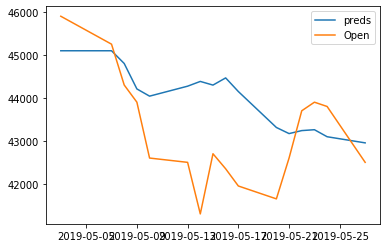

In [81]:
import matplotlib.pyplot as plt

plt.plot(test_df.lgbm_predict_unormal, label="preds")
plt.plot(test_df.Open, label="Open")
plt.legend()
plt.show()

## stacking

In [82]:
from datetime import datetime
import pandas_datareader.data as wb
 
start = datetime(2018,5,3)
end = datetime(2019,5,1)
train_df = wb.DataReader('005930.KS', 'yahoo',start,end) #삼성전자

start = datetime(2019,5,2)
end = datetime(2019,5,27)
test_df = wb.DataReader('005930.KS', 'yahoo',start,end) #삼성전자

In [83]:
import pandas as pd

train_df[train_df["Volume"]==0]
train_df.loc[train_df['Volume'] == 0, 'Volume'] = train_df['Volume'].median()

test_df[test_df["Volume"]==0]
test_df.loc[test_df['Volume'] == 0, 'Volume'] = test_df['Volume'].median()

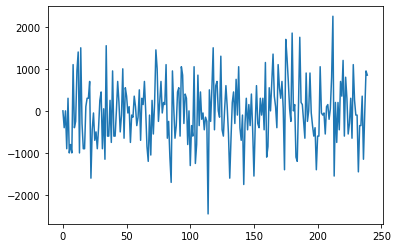

,High,Low,Open,Close,Volume,Adj Close,Open_normal
Date,,,,,,,
2018-05-04,53900.0,51800.0,53000.0,51900.0,39565391.0,50660.105469,0.0
2018-05-08,53200.0,51900.0,52600.0,52600.0,23104720.0,51343.382812,-400.0
2018-05-09,52800.0,50900.0,52600.0,50900.0,16128305.0,49683.992188,0.0
2018-05-10,51700.0,50600.0,51700.0,51600.0,13905263.0,50367.269531,-900.0
2018-05-11,52200.0,51200.0,52000.0,51300.0,10314997.0,50074.437500,300.0
...,...,...,...,...,...,...,...
2019-04-24,45650.0,44150.0,45400.0,44750.0,13299267.0,44750.000000,350.0
2019-04-25,45000.0,44100.0,44250.0,44650.0,10868965.0,44650.000000,-1150.0
2019-04-26,45000.0,43800.0,44200.0,44850.0,9739982.0,44850.000000,-50.0


In [84]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import matplotlib.pyplot as plt

# train_df - 정상성 시계열로 변환
y =train_df['Open']
b=[]
for i in range(1, len(y)):
    b.append(y[i] - y[i-1])
plt.plot(b)
plt.show()

# 정상성으로 변환시킨 Open값인 Open_normal 칼럼 추가
train_df = train_df.drop(train_df.index[0])
train_df['Open_normal'] = b
train_df

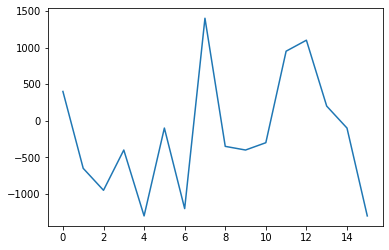

,High,Low,Open,Close,Volume,Adj Close,Open_normal
Date,,,,,,,
2019-05-03,46050,45300,45900,45300,6562916.0,45300,400
2019-05-07,45300,44400,45250,44850,12014907.0,44850,-650
2019-05-08,44850,44200,44300,44250,10398754.0,44250,-950
2019-05-09,44250,42450,43900,42450,23029718.0,42450,-400
2019-05-10,43450,42450,42600,42900,14579512.0,42900,-1300
2019-05-13,43200,42350,42500,42650,7635079.0,42650,-100
2019-05-14,43100,41300,41300,42650,11563730.0,42650,-1200
2019-05-15,43050,42550,42700,42550,7670185.0,42550,1400
2019-05-16,42400,41350,42350,41550,13687828.0,41550,-350


In [85]:
# test_df - 정상성 시계열로 변환
y =test_df['Open']
b=[]
for i in range(1, len(y)):
    b.append(y[i]-y[i-1])
plt.plot(b)
plt.show()

# 정상성으로 변환시킨 Open값인 Open_normal 칼럼 추가
test_df = test_df.drop(test_df.index[0])
test_df['Open_normal'] = b
test_df

In [86]:
train_df['lgbm_yhat'] = lgbm_y_hats[:len(train_df)]
test_df['lgbm_yhat'] = lgbm_y_hats[len(train_df):]

train_df['dt_yhat'] = dt_y_hats[:len(train_df)]
test_df['dt_yhat'] = dt_y_hats[len(train_df):]

train_df['rf_yhat'] = rf_y_hats[:len(train_df)]
test_df['rf_yhat'] = rf_y_hats[len(train_df):]

In [87]:
train_df

,High,Low,Open,Close,Volume,Adj Close,Open_normal,lgbm_yhat,dt_yhat,rf_yhat
Date,,,,,,,,,,
2018-05-04,53900.0,51800.0,53000.0,51900.0,39565391.0,50660.105469,0.0,0.000000,0.0,0.0
2018-05-08,53200.0,51900.0,52600.0,52600.0,23104720.0,51343.382812,-400.0,0.000000,0.0,0.0
2018-05-09,52800.0,50900.0,52600.0,50900.0,16128305.0,49683.992188,0.0,0.000000,0.0,0.0
2018-05-10,51700.0,50600.0,51700.0,51600.0,13905263.0,50367.269531,-900.0,0.000000,0.0,0.0
2018-05-11,52200.0,51200.0,52000.0,51300.0,10314997.0,50074.437500,300.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2019-04-24,45650.0,44150.0,45400.0,44750.0,13299267.0,44750.000000,350.0,93.021086,-1400.0,-426.0
2019-04-25,45000.0,44100.0,44250.0,44650.0,10868965.0,44650.000000,-1150.0,-444.587363,-1200.0,-508.5
2019-04-26,45000.0,43800.0,44200.0,44850.0,9739982.0,44850.000000,-50.0,-27.610355,-1200.0,-171.5


In [88]:
test_df

,High,Low,Open,Close,Volume,Adj Close,Open_normal,lgbm_yhat,dt_yhat,rf_yhat
Date,,,,,,,,,,
2019-05-03,46050,45300,45900,45300,6562916.0,45300,400,37.508099,0.0,-145.5
2019-05-07,45300,44400,45250,44850,12014907.0,44850,-650,-599.970668,-650.0,-677.0
2019-05-08,44850,44200,44300,44250,10398754.0,44250,-950,-619.317869,-1050.0,-343.0
2019-05-09,44250,42450,43900,42450,23029718.0,42450,-400,44.067250,400.0,395.0
2019-05-10,43450,42450,42600,42900,14579512.0,42900,-1300,687.435350,-700.0,472.5
2019-05-13,43200,42350,42500,42650,7635079.0,42650,-100,200.703784,-450.0,125.0
2019-05-14,43100,41300,41300,42650,11563730.0,42650,-1200,-50.651504,550.0,-67.0
2019-05-15,43050,42550,42700,42550,7670185.0,42550,1400,174.178105,-450.0,162.0
2019-05-16,42400,41350,42350,41550,13687828.0,41550,-350,-350.005126,-1400.0,-325.0


In [91]:
# 훈련 시 필요한 컬럼
feature_names = ['High', 'Low', 'Close', 'Volume', 'Adj Close', 'lgbm_yhat', 'dt_yhat', 'rf_yhat']

# LGBMRegressor 학습/예측
lgbm_reg = LGBMRegressor(random_state=256)
lgbm_reg.fit(train_df[feature_names], train_df.Open_normal)
lgbm_predict = lgbm_reg.predict(test_df[feature_names])
test_df['stacking_predict_normal'] = lgbm_predict

In [92]:
# E_t+E_(t-1)+...+E(2)+y_(1) #차분한 데이터의 t시점의 예측값
stacking_predict_unormal = []
y_1 = 45500 #2019년 5월 2일 Open값

for i in range(len(test_df)):
    stacking_unormal = 0
    # 첫번째항(2019년 5월 3일)의 경우 역차분값 = 2019년 5월 3일 차분예측값 + 2019년 5월 2일 Open값
    if i==0:
        stacking_unormal = stacking_unormal + test_df.stacking_predict_normal.iloc[i]
    else: 
        for j in range(i):
            stacking_unormal = stacking_unormal + test_df.stacking_predict_normal.iloc[j]
    
    stacking_unormal = stacking_unormal + y_1
    
    stacking_predict_unormal.append(stacking_unormal)
    
test_df['stacking_predict_unormal'] = stacking_predict_unormal
test_df

,High,Low,Open,Close,Volume,Adj Close,Open_normal,lgbm_yhat,dt_yhat,rf_yhat,lgbm_predict_normal,stacking_predict_normal,stacking_predict_unormal
Date,,,,,,,,,,,,,
2019-05-03,46050,45300,45900,45300,6562916.0,45300,400,37.508099,0.0,-145.5,-523.111735,-523.111735,44976.888265
2019-05-07,45300,44400,45250,44850,12014907.0,44850,-650,-599.970668,-650.0,-677.0,173.394713,173.394713,44976.888265
2019-05-08,44850,44200,44300,44250,10398754.0,44250,-950,-619.317869,-1050.0,-343.0,-573.069631,-573.069631,45150.282979
2019-05-09,44250,42450,43900,42450,23029718.0,42450,-400,44.067250,400.0,395.0,-307.212731,-307.212731,44577.213348
2019-05-10,43450,42450,42600,42900,14579512.0,42900,-1300,687.435350,-700.0,472.5,826.592500,826.592500,44270.000617
2019-05-13,43200,42350,42500,42650,7635079.0,42650,-100,200.703784,-450.0,125.0,331.803110,331.803110,45096.593117
2019-05-14,43100,41300,41300,42650,11563730.0,42650,-1200,-50.651504,550.0,-67.0,-567.901907,-567.901907,45428.396227
2019-05-15,43050,42550,42700,42550,7670185.0,42550,1400,174.178105,-450.0,162.0,373.619720,373.619720,44860.494320
2019-05-16,42400,41350,42350,41550,13687828.0,41550,-350,-350.005126,-1400.0,-325.0,-449.598669,-449.598669,45234.114040


In [93]:
stacking_mse = mean_squared_error(test_df.Open_normal, test_df.stacking_predict_normal)
stacking_rmse = np.sqrt(stacking_mse)
stacking_rmse

887.3780352375813

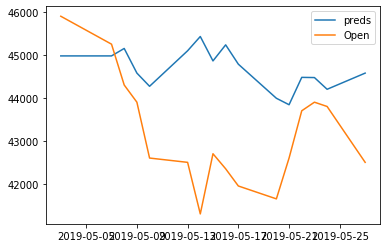

In [94]:
import matplotlib.pyplot as plt

plt.plot(test_df.stacking_predict_unormal, label="preds")
plt.plot(test_df.Open, label="Open")
plt.legend()
plt.show()

# 3번, 4번의 경우는 로그변환을 지수변환해서 rmse 하는 것처럼 차분했던 값을 변환시킨 후 rmse값을 구해야 함. 그 식은 내 카톡에 있는 마지막 식.